# Shor's algorithm for errors correction

## Simulated backend

## Step 1. Map the problem

### Setup

In [17]:
# General
import numpy as np

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp

# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

# Plotting routines
from qiskit.visualization import plot_distribution


In [18]:
# Code to run on a simulator:
 
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
backend = FakeBrisbane()

### Create a circuit, simulating a bit flip error

In [19]:
# Create a new circuit with 9 qubits
qc= QuantumCircuit(9)

#qc.x(0)
# Shor code (left side)
qc.cx(0,3)
qc.cx(0,6)

qc.h(0)
qc.h(3)
qc.h(6)
'''
qc.cx(0,1)
qc.cx(3,4)
qc.cx(6,7)

qc.cx(0,2)
qc.cx(3,5)
qc.cx(6,8)
'''
# error block
qc.barrier()
# bit flip error
#qc.x(0)
# phase flip error
qc.z(0)
qc.barrier()
# end error block

# Shor code (right side)
'''
qc.cx(0,1)
qc.cx(3,4)
qc.cx(6,7)

qc.cx(0,2)
qc.cx(3,5)
qc.cx(6,8)

qc.ccx(1,2,0)
qc.ccx(4,5,3)
qc.ccx(8,7,6)
'''
qc.h(0)
qc.h(3)
qc.h(6)

qc.cx(0,3)
qc.cx(0,6)
qc.ccx(6,3,0)
# Measure
qc.measure_all()

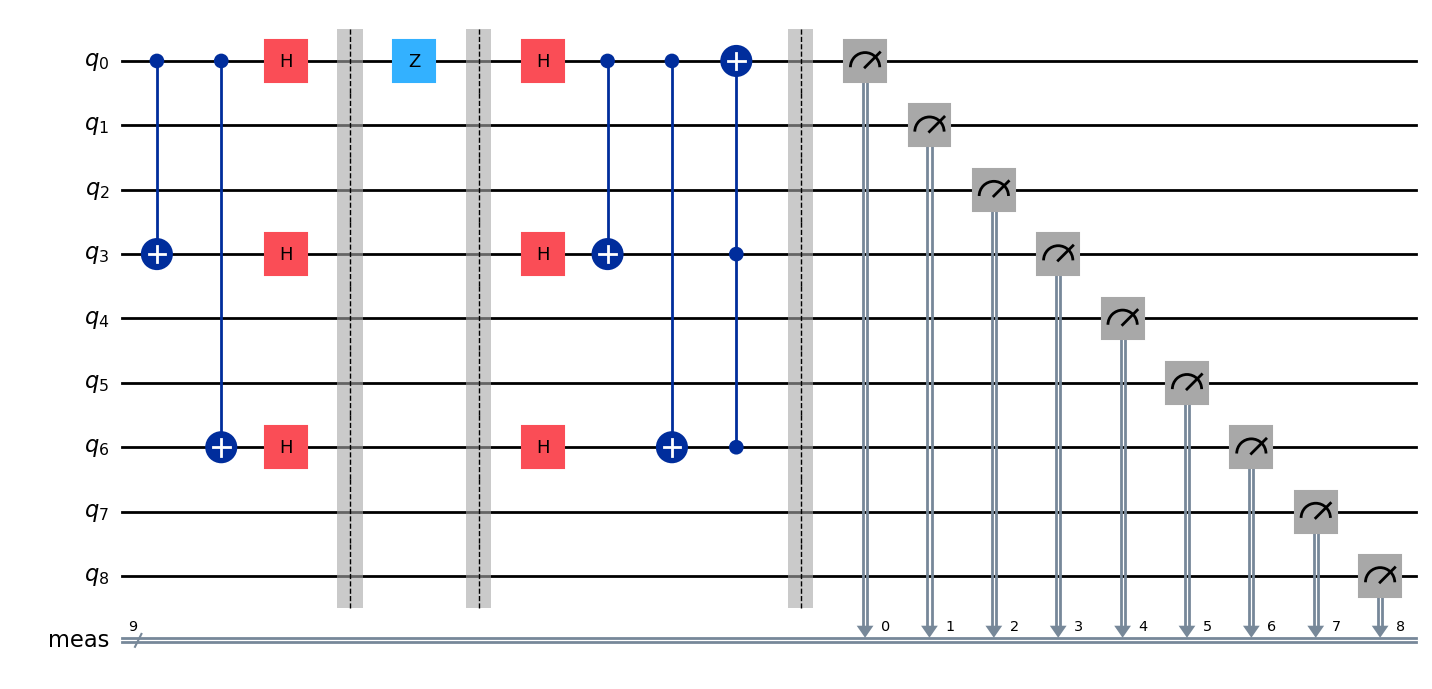

In [20]:
# Drawing the circuit
qc.draw("mpl")

## Step 2: Optimize the problem

### ISA circuit

In [21]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

isa_circuit = pm.run(qc)
#isa_circuit.draw(output="mpl", idle_wires=False, style="iqp")

## Step 3. Execute using Qiskit primitives

In [22]:
# To run on local simulator:
#   1. Use the SatetvectorSampler from qiskit.primitives instead
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1_000
result = sampler.run([isa_circuit]).result()
dist = result[0].data.meas.get_counts()

## Step 4. Post-process, return result in classical format

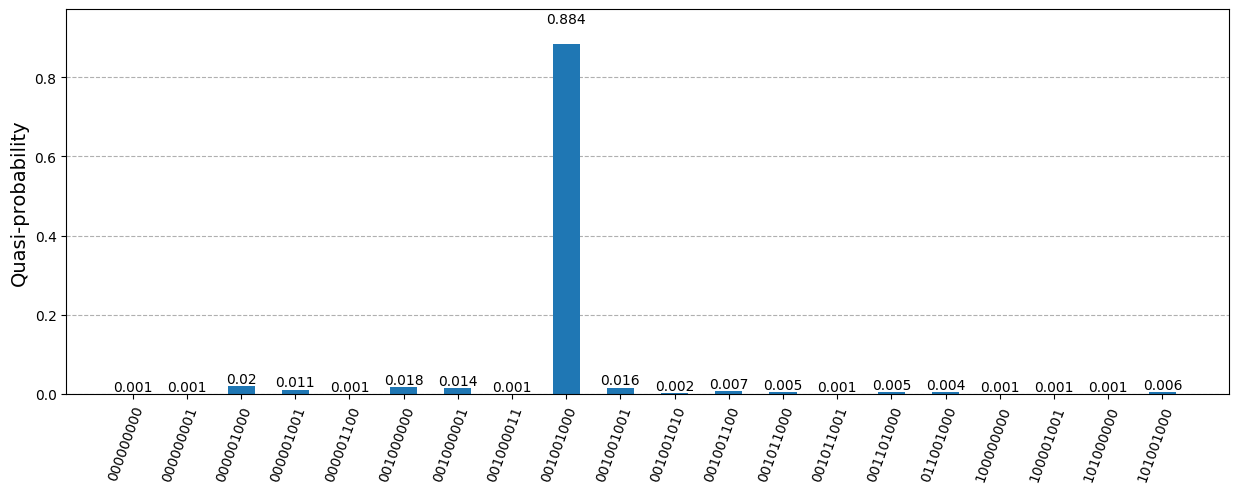

In [23]:
plot_distribution(dist, figsize=(15,5))

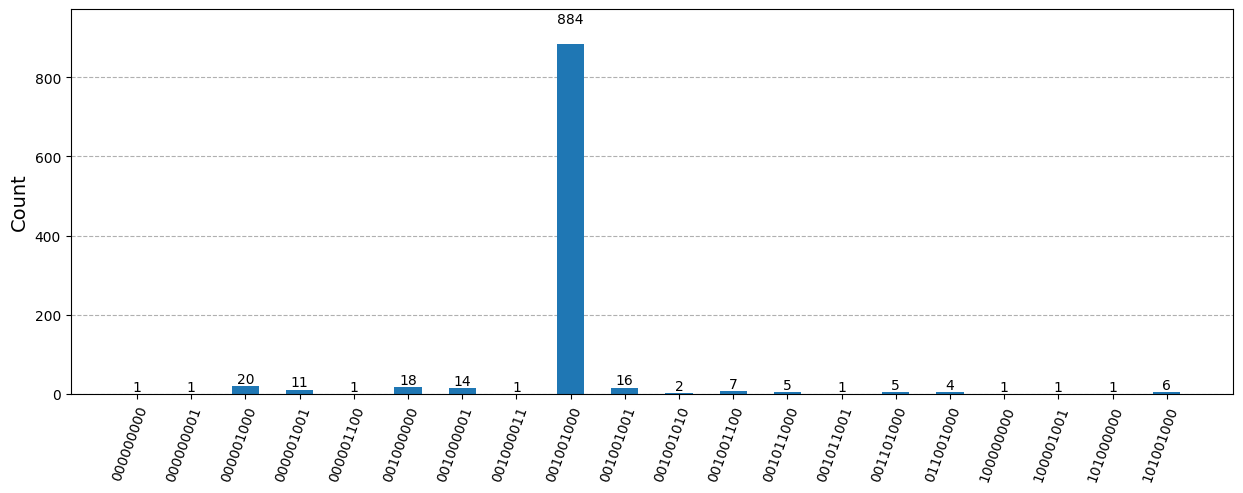

In [24]:
from qiskit.visualization import plot_histogram
plot_histogram(dist, figsize=(15,5))